<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
7. Bölüm - Veri Bilimi İçin İstatistik (201-204. videolar) - Vahit Keskin anlattı. </font>

# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

### İçindekiler

**Problem**

**Tek Örneklem T Testi**
- Veri Seti
- Varsayım Kontrolü *(Normal dağılım)*
    - Grafiksel Yöntemler ile *(Histogram veya Q-Q plot)*
    - Hipotez Testi ile *(Shapiro-Wilks Testi)*
- Tek Örneklem T Testi Uygulaması

**Nonparametrik Tek Örneklem Testi** *(Varsayımlar sağlanmazsa)*
- Sign Testi

## <font color='black'> Problem </font>

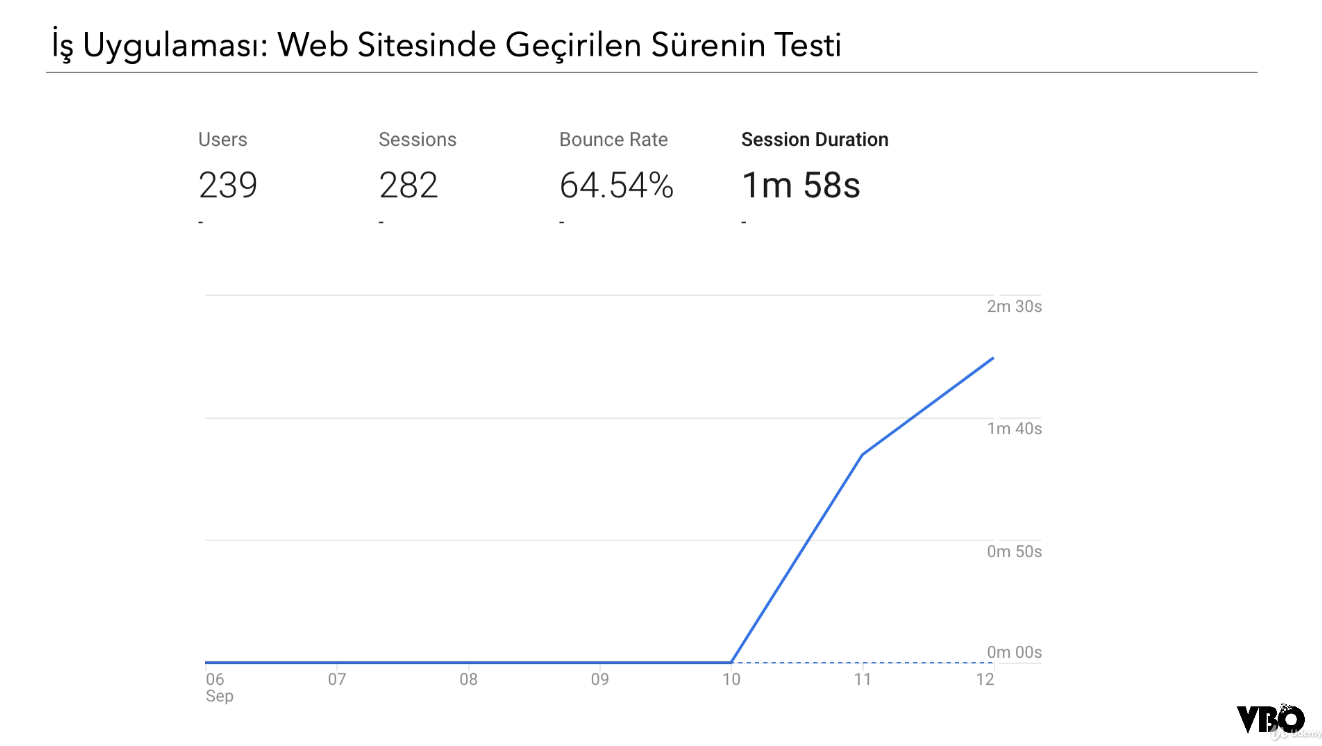

Session Duration: Web sitesinde geçirilen ortalama süre

**Problem**: 
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi? 

**Detaylar:** 

- Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var. 
- Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar. Böyle bir durum da olabilir veyak bir uygulama satın alındı dışarıdan. Uygulamanın web sitemizle ilgili vadettiği bir şey vardı diyordu ki web sitenizde geçirilen ortalama süreyi artırmaya katkı sağlayacağız. Bu bir ajans da olabilir, bir danışmanlık şirketi de olabilir. Ya yazılımlardan elde edilen bir süre var ya da çeşitli danışmanlık şirketlerinden alınan hizmetin sonucunda bize verilen veya test etmek istediğimiz bir süre var. 170 saniye.


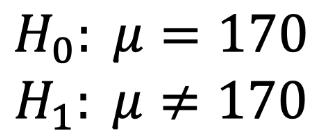

## <font color='black'> Tek Örneklem T Testi </font>

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

### <font color='blue'> Veri Seti </font>

Problemimiz: Web sitemizde geçirilen ortalama süre olarak bize sunulan 170 saniyenin böyle olamabileceği ile ilgili bir savımız bir iddiamız vardı ve bunu test etmek istiyorduk. Buna yönelik olarak gerekli ölçümler yapıldığında veri çok yüksek ihtimalle bize bir excel formunda gelecek olacak. Biz şu anda sıfırdan array formunda oluşturuyoruz.

In [1]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [2]:
olcumler # web sitemizde geçirilen zamanlar

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225, 211, 119, 157,
       145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146, 203, 224,
       203, 114, 188, 156, 187, 154, 177,  95, 165,  50, 110, 216, 138,
       151, 166, 135, 155,  84, 251, 173, 131, 207, 121, 120])

**Betimsel istatistikleri inceleyeceğiz. Buna yönelik olarak scipy'ın içerisinden `stats`ı import ediyoruz.**

In [3]:
import scipy.stats as stats

In [4]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

mean'e baktığımızda **ölçümlerin ortalaması 154**. Yani örnekten elde ettiğimiz değer 154. Bize sunulan araştırma isteği uyandıran değer ise 170. Zaten 154, 170'den küçük test yapmaya ne gerek var diye düşünebiliriz. Peki 154 şansa bağlı oluşmuş olamaz mı? Örneğin ben başka bir örneklem alsam 154 değeri değişebilir, dolayısıyla 154 değeri şansa bağlı bir şekilde oluşmuş olabilir. İşte bu şansa bağlı olarak oluşma ihtimalini bir hipotez kurarak test ettiğimizde ortadan kaldırmış olacağız. Çekmiş olduğumuz örneklemin ortaya çıkarabileceği bazı minik yanlılıkları da hipotez kurarak test ettiğimizde istatistiki olarak değerlendirilebilir bir zemine oturtturmuş oluyoruz.

Testi yapmadan önce varsayımlarımızı değerlendiriyoruz.

### <font color='blue'> Varsayım Kontrolü</font>

Tek Örneklem T testinin varsayımı normal dağılım olmasıydı.

Normallik varsayımı iki türlü gerçekleştirilebilir. 
1. Grafiksel yöntemlerle (Histogram, q-q plot teknikleri)
2. Bazı testler ile (Shapiro–Wilk testi)

Bizim odağımız grafiksel yöntemlerden ziyade daha bilimsel olarak kabul edebileceğimiz hipotez testleri olacaktır.

#### 1. Grafiksel Yöntemler ile

##### <font color='blue'>Histogram </font>

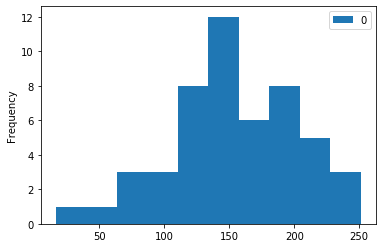

In [7]:
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

Bu dağılımı incelediğimizde çok ciddi bir bozukluk gözükmemektedir. Dağılım normal olduğu izlenimi verilmektedir. 

##### <font color='blue'>q-q plot</font>

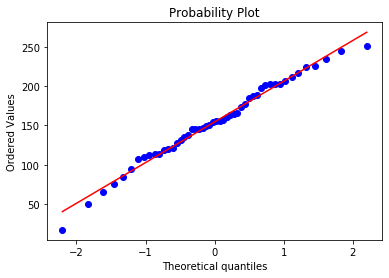

In [8]:
#q-q plot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

Grafik incelendiğinde normal dağılım varsayımının sağlandığı gözlemlenmektedir. q-q plot çıktısında sol taraf örnek dağılımını al taraf ise teorik dağılımı ifade eder. Örnek dağılım (ordered values) elimizdeki ölçümlerdir. Teorik dağılım ise ilgilenmiş olduğumuz normal dağılımdır. İşte teorik dağılımla normal dağılım arasında bir değerlendirme imkanı sağlar bize q-q plot. Ve bunun aracılığıyla biz de elimizdeki örneğin normal dağılıp dağılmadığına ilişkin bir bilgi sahibi olmuş oluruz. Örnek dağılımla teorik normal dağılım arasındaki dağılımın birbirine benzer olması durumunu gözlemleyebilmek adına noktalarımızın ortadaki kırmızı çizginin etrafında konumlanmasını bekleriz ki bu durum incelendiğinde noktalarımızın kırmızı çizgi etrafında konumlandığı gözükmektedir.  

Grafiksel yaklaşımlar hataya müsaittir. 

#### 2. Hipotez Testi ile

Hipotez testinin içerisindeyiz ve başka bir hipotez testi yapacağız.

##### <font color='blue'>Shapiro-Wilks Testi  </font>

````
H0: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık vardır.

````
Bu hipotezin sonucunda H0'ı reddetmememiz lazım. 

In [9]:
from scipy.stats import shapiro

In [10]:
shapiro(olcumler)

(0.9853105545043945, 0.7848747968673706)

İki değerli bir çıktı elde ettik. Sol taraftaki değer test istatistiğini ifade ediyor, sağ taraftaki değer ise p-value değerini ifade ediyor. p-value 0.05'ten küçük çıkarsa H0'ı reddediyorduk, eğer büyük çıkarsa reddedemiyorduk. Bu duruma göre H0 hipotezi reddedilemez. Çünkü 0.78 değeri 0.05 (alfa değeri)ten küçük değildir. H0 hipotezi neydi "Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık yoktur." o halde tek örneklem t testini uygulayabiliriz. Çünkü normal dağılım varsayımı sağlanmaktadır.

In [11]:
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


### <font color='blue'>Tek Örneklem T Testi Uygulaması</font>

Varsayım sağlandığına göre Tek Örneklem T testi uygulamasını yapıyoruz.

In [16]:
stats.ttest_1samp(olcumler, popmean = 170)  # popmean = population mean

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

**olcumler:** verilerimiz

**popmean:** 170 -> population meanın 170 olup olmadığını sorgulamak istiyoruz.

Yorumlarımızı p-value değerine göre yapıyoruz. p-value=0.03 çıkmış. Bu sonuç bize gösteriyor ki elde etmiş olduğumuz p-value değeri çalışmanın başında kabul edilebilir hata miktarı olarak kabul ettiğimiz alfa yani 0.05 değerinden küçük olduğundan dolayı H0 hipotezi reddedilir. 

Başta kurduğumuz hipotezi hatırlayalım.
````
H0: Web sitemizde geçirilen ortalama süre 170'tir. 

H1: Web sitemizde geçirilen ortalama süre 170 değildir.
````

Zaten örneklemden elde ettiğimiz değer de 154 civarı bir değer olduğundan dolayı web sitemizde geçirilen ortalama süre 170 değildir, 170'ten küçüktür yorumunu yaparız.

## <font color='black'>Nonparametrik Tek Örneklem Testi  </font>

**Tek Örneklem T Testinin Varsayımları Sağlanmasaydı:** 

Önceki bölümde hipotezimizi reddettik ve web sitemizde geçirilen sürenin 170 saniyeden farklı olduğunu istatistiki olarak ortaya koyduk. Burada yapmış olduğumuz tek örneklem t testiydi. Bu parametrik bir testtir. 

*Parametrik test ne demek?*

Çeşitli varsayımların sağlandığı durumda uygulanabilen testler. Tek örneklem t testine ilişkin olan varsayım normallik varsayımıydı ve bu varsayımın sağlandığını gözlemlemiştik. Bundan dolayı parametrik bir test olan tek örneklem t testini uygulayabilmiştik.

Fakat gerçek hayatta bazı durumlarda ilgilendiğimiz hipotez testlerine ilişkin varsayımlar sağlanamayabilmektedir. 

Varsayalım ki önceki bölümde yapmış olduğumuz shapiro-wilks testinin sonucu negatif çıktı. Yani H0 hipotezini reddettik. Yani ne demiş olduk? Örnek dağılımıyla teorik normal dağılım arasında istatistiki olarak anlamlı bir farklılık vardır. Bu durumda tek örneklem t-testini kullanamıyoruz. Çünkü bu varsayımlar sağlanmazsa bu testler güvenilir olmayacaktır. Bu durumda nonparametrik tek örneklem testi yapacağız ki birçok test var. Bunlardan birisi sign_testtir yani işaret testi. 

````
H0: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1: Örnek dağılımı ile teorik normal dağılımı arasında istatistiksel olarak anlamlı bir farklılık vardır.

````

#### <font color='blue'>Sign Testi  </font>

In [1]:
from statsmodels.stats.descriptivestats import sign_test

In [3]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

Sol taraftaki test istatistiği, sağ taraftaki ise p-value değeri. Bu durumda önceki hipotez testimiz kavram olarak geçerlidir. Sadece ufak farklılıklar yer almaktadır. Medyan değerine ilişkin bir hipotez kurulmaktadır. Şöyle düşünüp ilerleyeceğiz. Yine bir test yapılıyor. Merkezi eğilime yönelik bir test. (Bu sefer biraz daha ortalama ifadesinden kaçınıyorum) Merkezi eğilimin 170 olup olmadığını test etmiş olduk. Dağılım çarpık olduğunda bu durumda ortalamanın kullanılamıyor aynı zamanda parametrik test de kullanılamıyor. (Nonparametrik bir hipotez testi kurduğumuzda o hipotez testinin kavramsal karşılığı yine aynı olsa da farklılıklar ortaya çıkmaktadır. )

p-value değeri 0.06'ymış yani 0.05'ten küçük değil. H0'ı reddedemiyoruz diyoruz. Fakat bizim dağılımız zaten normaldi. Dolayısıyla bu sonuçla ilgilenmiyoruz. Elimizdeki veri zaten parametrikti çünkü. Sadece bu test nasıl yapılıyormuş onu görmüş olduk. 